<a href="https://colab.research.google.com/github/ngyzy/My_First_Repo/blob/main/MC_Data_Analytics_MCLASS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MODULE 6.2**



---



**Tutor: Mr Costley**



---

**Topic: Machine Learning Basics**



**SUB TOPIC: INTRODUCTION TO MACHINE LEARNING**

**UNSUPERVISED MACHINE LEARNING & DIMENSIONAL REDUCTION**

In [1]:
import pandas as pd
import numpy as np


In [10]:
#module used for clusters
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [4]:
#add the data path with csv
df=pd.read_csv("/content/DATA/HousingData.csv")

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [7]:
df.shape

(506, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [13]:
df.isna().sum()

,0
CRIM,20
ZN,20
INDUS,20
CHAS,20
NOX,0
RM,0
AGE,20
DIS,0
RAD,0
TAX,0


In [15]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')   # or 'median'
df_clean = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [16]:
df_clean.isna().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [17]:
df_clean.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,11.43,36.2


In [18]:
df_clean.shape

(506, 14)

In [19]:
#Unsupervised machine learning
kmeans=KMeans(n_clusters=3,random_state=42)
df_clean['Cluster']=kmeans.fit_predict(df_clean)

In [ ]:
df_clean

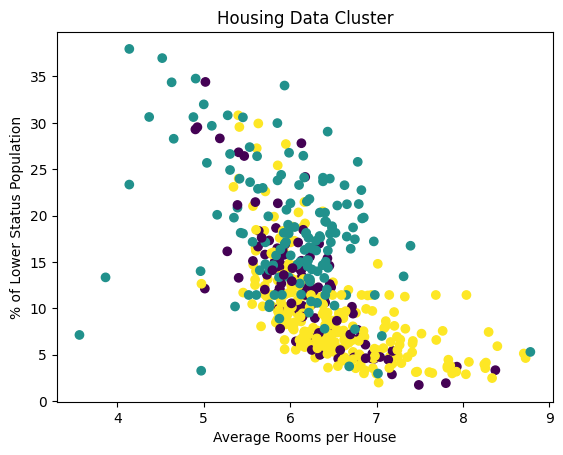

In [23]:
#Plot Clusters based on two features
plt.scatter(df_clean['RM'],df_clean['LSTAT'],c=df_clean['Cluster'],cmap='viridis')
plt.xlabel('Average Rooms per House')
plt.ylabel('% of Lower Status Population')
plt.title('Housing Data Cluster')
plt.show()

**DIMENSIONALITY REDUCTION**

In [24]:
from sklearn.decomposition import PCA
import seaborn as sns

In [25]:
pca=PCA(n_components=2)
df_pca=pca.fit_transform(df_clean)

In [26]:
df_pca=pd.DataFrame(df_pca,columns=['PC1','PC2'])
df_pca['Cluster']=df_clean['Cluster']

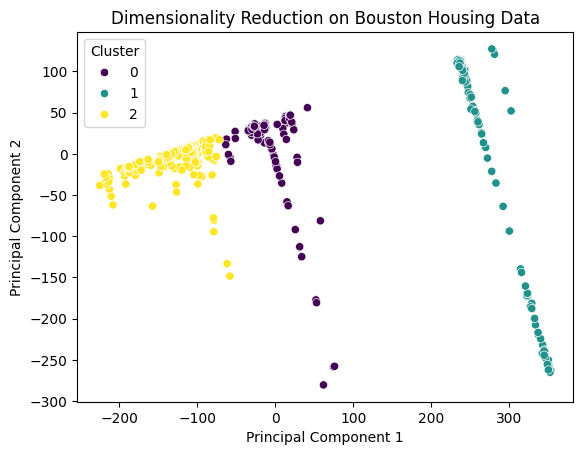

In [27]:
sns.scatterplot(x='PC1',y='PC2', hue='Cluster', data=df_pca, palette='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Dimensionality Reduction on Bouston Housing Data')
plt.show()